In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv("creditcard.csv")[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [3]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X, y).predict(X).sum()

171

In [5]:
lr = LogisticRegression()
??lr.score

NameError: name 'LogisticRegression' is not defined

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

def min_recall_precision(est, X, y_true, sample_weight=None):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in np.linspace (1, 20, 30)]},
    scoring={'precision': make_scorer(precision_score),
             'recall_score': make_scorer(recall_score),
            'min_both': make_scorer(min_recall_precision)}, 
    refit = 'min_both',
    return_train_score=True,
    cv = 10,
    n_jobs = -1
)
grid.fit(X, y);

NameError: name 'lr' is not defined

In [6]:
grid.cv_results_

{'mean_fit_time': array([2.2509551 , 2.13090239, 2.02991667, 2.05384459, 1.91615381,
        2.39396856, 2.51818612, 2.30205808, 2.23471434, 2.44651997,
        2.0881434 , 2.14116218, 2.15684147, 2.05831149, 2.03057036,
        2.17027678, 2.20340989, 2.23579936, 2.2048517 , 2.23020065,
        2.21089098, 2.2002589 , 2.25495956, 2.09738388, 2.46190627,
        2.1337214 , 2.33243468, 2.28127205, 2.2076432 , 2.20122211]),
 'std_fit_time': array([0.29632971, 0.31384326, 0.16447891, 0.22362577, 0.39035763,
        0.42023479, 0.28844357, 0.19119305, 0.24419057, 0.3928654 ,
        0.24386733, 0.32669651, 0.22455438, 0.32583377, 0.24288495,
        0.28427783, 0.27710791, 0.24810661, 0.18098827, 0.26596157,
        0.26918482, 0.29888167, 0.26833705, 0.27962972, 0.20766256,
        0.275314  , 0.39206144, 0.26263153, 0.32479318, 0.26383677]),
 'mean_score_time': array([0.05183172, 0.06094878, 0.05532076, 0.04879453, 0.04882162,
        0.06356938, 0.07332768, 0.06165643, 0.04335508, 0.05

In [7]:
from sklearn.metrics import precision_score, recall_score

precision_score(y, grid.predict(X))

0.8115942028985508

In [8]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_both,split3_train_min_both,split4_train_min_both,split5_train_min_both,split6_train_min_both,split7_train_min_both,split8_train_min_both,split9_train_min_both,mean_train_min_both,std_train_min_both
0,2.250955,0.296330,0.051832,0.008058,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,2.130902,0.313843,0.060949,0.018217,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.463415,0.583333,1.000000,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,2.029917,0.164479,0.055321,0.017194,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.463415,0.583333,1.000000,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,2.053845,0.223626,0.048795,0.010190,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.452381,0.583333,1.000000,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,1.916154,0.390358,0.048822,0.007340,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.452381,0.583333,1.000000,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959
5,2.393969,0.420235,0.063569,0.016690,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.452381,0.583333,1.000000,...,0.841808,0.768362,0.778409,0.789773,0.772727,0.789773,0.795455,0.772727,0.792485,0.029289
6,2.518186,0.288444,0.073328,0.024125,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.802260,0.789773,0.813559,0.801136,0.801136,0.804469,0.789773,0.810493,0.020970
7,2.302058,0.191193,0.061656,0.018432,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.804469,0.802198,0.811111,0.798883,0.806818,0.807692,0.804469,0.815197,0.020943
8,2.234714,0.244191,0.043355,0.007225,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.944444,0.452381,0.583333,0.947368,...,0.837989,0.806630,0.805405,0.812155,0.801105,0.811111,0.807487,0.806630,0.816403,0.018628
9,2.446520,0.392865,0.056413,0.011762,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.452381,0.583333,0.947368,...,0.838889,0.807692,0.805405,0.812155,0.802198,0.812155,0.808511,0.809783,0.817098,0.018411


In [19]:
plt.figure(figsize=(12, 4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df['param_class_weight']], 
             df[score], 
             label=score)
plt.legend();

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

<Figure size 1200x400 with 0 Axes>

In [10]:
#Below code was used to find whether there was even a mean_test_recall column. I found that it was not even there in the first case which was giving a key error message.
#fixed it by just using the mean_test_recall_score

In [18]:
plt.figure(figsize=(12, 4))
df = pd.DataFrame(grid.cv_results_)

# Print the column names to check for correctness
print(df.columns)

for score in ['mean_test_recall', 'mean_test_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']], 
             df[score], 
             label=score)
plt.legend()


AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

<Figure size 1200x400 with 0 Axes>

In [ ]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

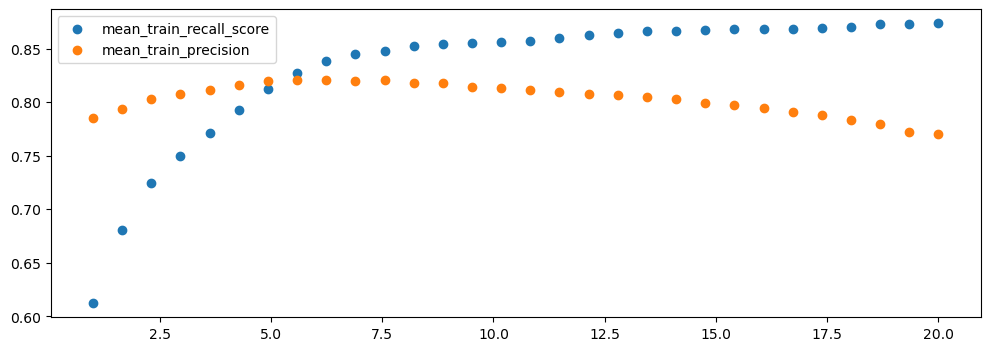

In [12]:
plt.figure(figsize=(12, 4))
df = pd.DataFrame(grid.cv_results_)

for score in ['mean_train_recall_score', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df['param_class_weight']],
               y=df[score.replace('test', 'train')],
               label=score)
    
plt.legend()

In [ ]:
s = make_scorer(min_recall_precision)
??s

In [8]:
%pip install --upgrade scikit-learn==0.23.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




  Using cached scikit-learn-0.23.0.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


In [4]:
--NotebookApp.iopub_data_rate_limit=1.0e10

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3936940341.py, line 1)

In [3]:
notebook --NotebookApp.iopub_data_rate_limit=1.0e10

UsageError: the following arguments are required: filename


In [5]:
jupyter notebook --generate-config

SyntaxError: invalid syntax (1387249117.py, line 1)